In [1]:
from SpinTools.spinhamiltonian import spinhamiltonian as sh
import numpy as np
from scipy.constants import physical_constants as spc
from scipy.constants import constants as sc
import itertools

h = spc["Planck constant"][0]

ham = sh.SpinHamiltonian("P")

In [2]:
def decorator(gamma_function):
    def wrapper_function(*args,**kwargs):
        return gamma_function(*args,**kwargs)
    return wrapper_function

@decorator
def zeeman(Bz):
    return ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

# @decorator
# def gamma(row,eigvec,hdrive):
#     return list(map(lambda col : 1e24*abs(np.matmul(eigvec[:,row].conjugate(), 
#                 np.matmul(hdrive,eigvec[:,col]))), range(row+1,len(eigvec))))

@decorator
def gamma(row,eigvec,hdrive):
    return list(map(lambda col : 1e24*abs(np.matmul(eigvec[:,col].conjugate(), 
                np.matmul(hdrive,eigvec[:,row]))), range(row+1,len(eigvec))))

@decorator
def hamiltonian(Bz):
    return ham.get_hamiltonian([0,0,Bz]) / h / 1e09
#     return ham.hyperfine()

@decorator
def estate(H):
    return np.linalg.eig(H)

@decorator
def E(evals):
    return evals[1] - evals[0]

def get_gamma_values(gam):
    gam = np.array([x for x in gam for x in x])
    gam = list(itertools.chain.from_iterable(gam))
    return list(filter(lambda a: a != 0, gam))

In [10]:
b = np.arange(0.2,0.21,0.0005)

H = list(map(hamiltonian,b)) # Get spin hamiltonian
Hds = zeeman(1) # Get perturbation hamiltonian
e = list(map(estate,H)) # get eigenstates

# Get transition rate
gam = [[gamma(i,e[k][1],Hds) for i in range(len(Hds[0]))] for k in range(len(b))]

# Flatten transition rates and give only the values
gam = get_gamma_values(gam)

# Get eigenvalues for each matrix element
evals = [e[i][0] for i in range(len(b))]
energy = [E(evals[i]) for i in range(len(b))]

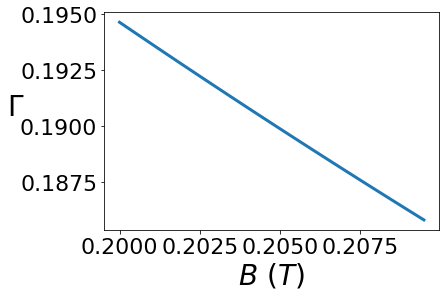

In [11]:
from matplotlib import pyplot as plt
plt.plot(b[0:len(b)],gam)
plt.xlabel('$B$ ($T$)')
plt.ylabel('$\Gamma$',rotation=0)
plt.show()